# Tienda online Ice

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. 

# Objetivo del proyecto

El objetivo del proyecto es analizar los datos de ventas de videojuegos, identificando patrones y factores que incidan en el éxito de los juegos y las plataformas. De esta manera, se podrá determinar campañaz publicitarias y estrategias comerciales para el siguiente año. Este análisis, permitirá determinar la rentabilidad de las plataformas, la popularidad de los juegos y las características que afectan las ventas en distintas regiones del mundo.

Acciones a seguir:
- Cargar las bibliotecas necesarias para el análisis
- Cargar el archivo /datasets/games.csv 
- Explorar las columnas presentadas en el dataset, obteniendo un panorama general e identificando posibles datos ausentes, duplicados y corroborando que los tipos de datos y formato para las columnas son correctos.
- Preparar los datos, convirtiendo los tipos de datos cuando se requiera.
- Manejar los datos ausentes, optando por rellenar datos o eliminarlos, según su impacto en el análisis.
- Adicionar las columnas necesarias como el total de ventas.
- Analizar los datos a profundidad, considerando gráficas y estadística descriptiva para conocer la distribución de juegos por año, las ventas por plataforma, la duración de las plataformas y el liderazgo en ventas, identificar la relación entre las puntuaciones de críticos y usuarios y las ventas, conocer la distribución de géneros y la rentabilidad de los mismos.
- Analizar los datos por región.
- Realizar pruebas de hipótesis para rechazar o no los siguientes planteamientos:

    - *Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas*.
    - *Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes*.
    
- Resumir los hallazgos en conclusiones y recomendaciones.


In [135]:
### Cargar bibliotecas 
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
import seaborn as sns
from matplotlib import pyplot as plt

## Paso 1. Abre el archivo de datos y estudia la información general 

In [136]:
### Cargar datos
df = pd.read_csv('/datasets/games.csv')

In [137]:
df.info()

print(df.head())
print(df['User_Score'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08  

Se observa que el tipo de datos para la columna Year_of_Release debería ser int al tratarse de años. De igual manera, la columna user_score debe tener un formato numérico, transformando los datos TBD a NAN para pasar a un tipo float. Es necesario también, corroborar los máximos de las columnas Critic_Score y User_Score para comprobar que se respeta el rango de calificación. Adicionalmente, se deben cambiar los nombres de las columnas a minúsculas para mayor consistencia.

Asimismo, se identificó la existencia de datos ausentes en las columnas correspondientes al nombre del juego, año de lanzamiento, genero, calificación tanto de los críticos como de los usuarios y rating. El tratamiento para los valores ausentes difiere según la columna y la importancia para el análisis.


## Paso 2. Prepara los datos

In [138]:
### Preparación de los datos
# cambiar nombres de columnas a minúsculas
df.columns = df.columns.str.lower()

# Cambiar tipo de datos user_score
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Comprobar minimos y maximos de las columnas credit_score y user_score 
print(df['critic_score'].min(), df['critic_score'].max())
print(df['user_score'].min(), df['user_score'].max())

# Tratamiento de datos ausentes
df = df.dropna(subset=['name'])
df = df.dropna(subset=['genre'])
df = df.dropna(subset=['year_of_release'])

df['rating'] = df['rating'].fillna("no especificado")

# Cambiar tipo de datos year_of_release 
df['year_of_release'] =df['year_of_release'].astype('int')

df.info()

13.0 98.0
0.0 9.7
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


- Los valores ausentes en la columna name y genre son eliminados ya que solo son dos filas y no afectará al análisis global, además el genero es primordial para cualquier clasificación. Se procederá a esta eliminación ya que es posible que sea un mal registro o un registro incompleto.
- Los valores ausentes en la columna Year_of Release se eliminaron, al tratarse de menos de 300 casos, ya que es una columna primordial para el análisis y esto puede deberse a un registro incompleto.
- Los valores ausentes en las columnas Critic_Score y User_Score se dejaran como NAN ya que no todos los juegos deben tener necesariamente críticas disponibles y eliminar las filas no es una opción ya que estos valores corresponden a casi el 50% de los datos. La columna User_Score presenta datos como "tbd" to be determined, estos casos serán considerados como valores ausentes convirtiendo la columna a formato numérico para facilitar análisis posteriores.
- En el caso de los valores ausentes de la columna rating, se definen como "no especificado".

In [139]:
### Adicionar columnas convenientes
# Crear la columna ventas totales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score           rating  \
0     28.96      3.77         8.45          76.0         8.0                E   
1      3.58      6.81         0.77           NaN         NaN  no especificado   
2     12.76      3.79         3.29          82.0         8.3                E   
3     10.93      3.28         2.95          80.0         8.0                E   
4      8.89     10.22         1.00           NaN         NaN  no especificado   

   total_sales  
0        

## Paso 3. Analiza los datos

- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

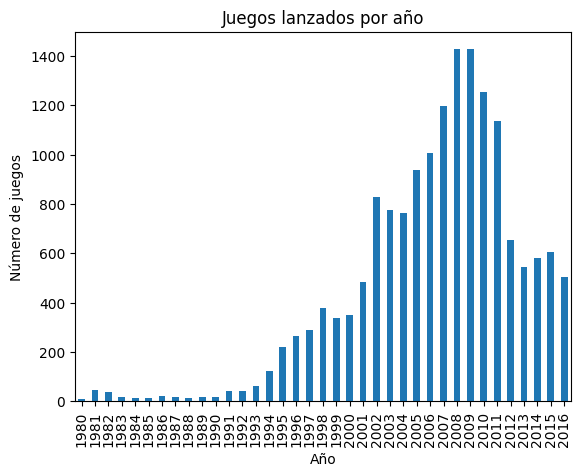

In [140]:
### Análisis de los datos
# Juegos lanzados por periodo
df_game_by_year = df.groupby('year_of_release')['name'].count().rename('games').sort_index().reset_index()

# Grafico de barras
df_game_by_year.plot(x='year_of_release',
                    kind='bar',
                    title='Juegos lanzados por año',
                    xlabel='Año',
                    ylabel='Número de juegos',
                    legend=False)
plt.show()


Se puede observar que los datos obtenidos para los años comprendidos entre 1980 y 1994 no son representativos, ya que son extremadamente bajos. Esto puede deberse a un mal registro o un registro incompleto de juegos para ese periodo. Por otra parte, se observa un incremento notable en los juegos lanzados a partir de 1995 hasta el 2009, identificando una tendencia en la industria que es consecuente con la cultura de los videojuegos para esa época. De manera contraria, se identificó una tendencia a la disminución de juegos lanzados a partir del año 2010, esto puede deberse a un cambio en el mercado con el crecimiento y posicionamiento del celular inteligente a partir de esos años.

- Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

  platform  total_sales
0      PS2      1233.56
1     X360       961.24
2      PS3       931.34
3      Wii       891.18
4       DS       802.78
5       PS       727.58
6      PS4       314.14
7      GBA       312.88
8      PSP       289.53
9      3DS       257.81


platform         3DS    DS  GBA     PC     PS  PS2  PS3  PS4  PSP  Wii  X360
year_of_release                                                             
1985             0.0  0.02  0.0   0.04   0.00  0.0  0.0  0.0  0.0  0.0   0.0
1988             0.0  0.00  0.0   0.03   0.00  0.0  0.0  0.0  0.0  0.0   0.0
1992             0.0  0.00  0.0   3.03   0.00  0.0  0.0  0.0  0.0  0.0   0.0
1994             0.0  0.00  0.0  12.87   6.03  0.0  0.0  0.0  0.0  0.0   0.0
1995             0.0  0.00  0.0   4.22  35.96  0.0  0.0  0.0  0.0  0.0   0.0


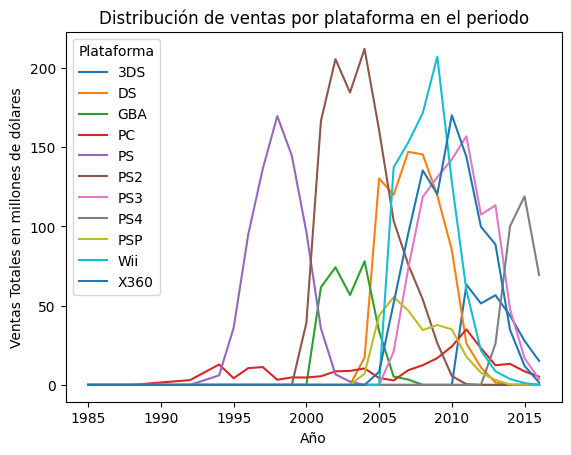

  platform  min_year
0     2600      1980
1      3DO      1994
2      3DS      2011
3       DC      1998
4       DS      1985


  platform  max_year
0     2600      1989
1      3DO      1995
2      3DS      2016
3       DC      2008
4       DS      2013


   platform  min_year  max_year  duration
13       PC      1985      2016        31
4        DS      1985      2013        28
5        GB      1988      2001        13
28     X360      2005      2016        11
19      PSP      2004      2015        11


La duración mínima en el mercado es de 0 años
La duración máxima en el mercado es de 31 años
En promedio la duración en el mercado es de 7.612903225806452 años


In [141]:
# Plataformas más populares respecto a ventas
df_platform_sales = df.groupby('platform')['total_sales'].sum().rename('total_sales').sort_values(ascending=False).reset_index()
print(df_platform_sales.head(10))
print('\n')
popular_platform = df_platform_sales[df_platform_sales['total_sales']>255]['platform']
#Ventas por periodo según plataforma
#df_platform_sales_by_year = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().rename('total_sales').sort_index().reset_index()
#print(df_platform_sales_by_year.head())
df_platform_sales_by_year = df[df['platform'].isin(popular_platform)]
df_platform_sales_by_year = df_platform_sales_by_year.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)
print(df_platform_sales_by_year.head())
# Distribución de ventas por plataforma en el periodo
df_platform_sales_by_year.plot(kind='line')
plt.title('Distribución de ventas por plataforma en el periodo')
plt.xlabel('Año')
plt.ylabel('Ventas Totales en millones de dólares')
plt.legend(title='Plataforma')
plt.show()

#Tiempo de permanencia en el mercado 
df_min_year = df.groupby('platform')['year_of_release'].min().rename('min_year').reset_index()
df_max_year = df.groupby('platform')['year_of_release'].max().rename('max_year').reset_index()
print(df_min_year.head())
print('\n')
print(df_max_year.head())
df_duration = df_min_year.merge(df_max_year, on='platform')
df_duration['duration'] = df_duration['max_year'] - df_duration['min_year']
print('\n')
print(df_duration.sort_values(by='duration', ascending=False).head())
print('\n')
print(f"La duración mínima en el mercado es de {df_duration['duration'].min()} años")
print(f"La duración máxima en el mercado es de {df_duration['duration'].max()} años")
print(f"En promedio la duración en el mercado es de {df_duration['duration'].mean()} años")

Se observa que las 5 principales plataformas en ventas facturan más del doble que el resto de plataformas, esta lista está encabezada por la PS2. Por otra parte, en el gráfico de líneas de las plataformas más populares, se observa que el mercado sigue una tendencia de crecimiento en los primeros años de lanzamiento y posteriormente una fuerte disminución en ventas, que puede deberse al surgimiento de nuevas plataformas o juegos o el lanzamiento de nuevas versiones de las mismas plataformas que hace que las ventas tiendan a cero en algún punto. En general, todas las plataformas llegaron a su punto de madurez y salida del mercado a excepción de la PS4 que recien comienza su periodo de decrecimiento. El periodo de permanencia en el mercado  varía segun la popularidad de la plataforma, sin embargo, se registran duraciones desde 0 hasta 31 años que es el caso de la PC que se mantiene vigente hasta el 2016. En promedio se registran permanencias en el mercado de 7 años.

- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

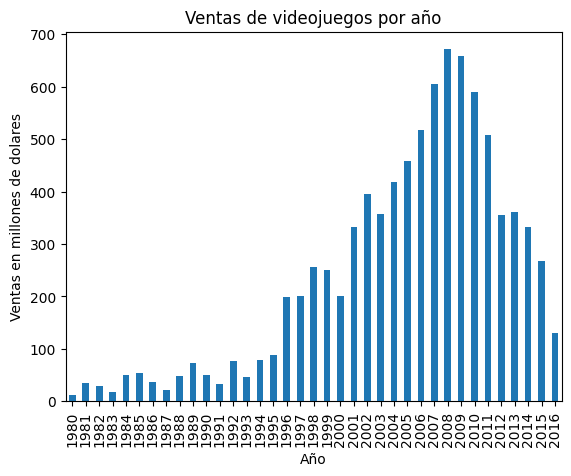

In [143]:
# Ventas por año
sales_by_year = df.groupby('year_of_release')['total_sales'].sum().rename('total_sales').reset_index()
sales_by_year.plot(x='year_of_release',
                  kind='bar',
                  title='Ventas de videojuegos por año',
                  xlabel='Año',
                  ylabel='Ventas en millones de dolares',
                  legend=False)
plt.show()

Como se puede observar en los gráficos y análisis previos, el dataset incluye datos desde 1980, sin embargo, se tomará en cuenta el periodo comprendido entre el 2005 y el 2016 para reflejar tendencias actuales en plataformas y ventas.

- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Las 5 plataformas líderes en ventas son: 
   platform  total_sales
13     X360       961.24
7       PS3       931.34
11      Wii       891.18
2        DS       785.49
6       PS2       426.46
     year_of_release platform  total_sales
0               2005       DS       130.14
8               2006       DS       119.81
19              2007       DS       146.94
30              2008       DS       145.31
38              2009       DS       119.54
45              2010       DS        85.02
53              2011       DS        26.18
62              2012       DS        11.01
71              2013       DS         1.54
4               2005      PS2       160.66
12              2006      PS2       103.42
23              2007      PS2        75.99
32              2008      PS2        53.90
40              2009      PS2        26.40
47              2010      PS2         5.64
55              2011      PS2         0.45
13              2006      PS3        20.96
24              2007      PS3     

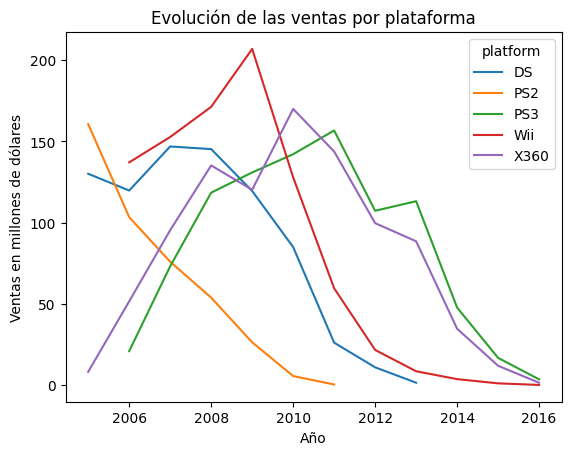

In [157]:
#Plataformas líderes en ventas
df = df[df['year_of_release']>2004]
top_platforms = df.groupby('platform')['total_sales'].sum().rename('total_sales').reset_index().sort_values(by='total_sales', ascending=False).head()
print(f"Las 5 plataformas líderes en ventas son: \n{top_platforms}")

#Evolución de ventas por plataformas líderes
evol_sale_by_platform = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index().sort_values(by=['platform', 'year_of_release'])
evol_sale_by_platform = evol_sale_by_platform[evol_sale_by_platform['platform'].isin(top_platforms['platform'])]
print(evol_sale_by_platform)

evol_pivot = evol_sale_by_platform.pivot_table(index='year_of_release', columns='platform', values='total_sales')

evol_pivot.plot(title='Evolución de las ventas por plataforma',
               xlabel='Año',
               ylabel='Ventas en millones de dólares')
plt.show()

Se puede observar que las cinco plataformas más rentables en cuanto a ventas acumuladas son 'X360', 'PS3', 'Wii', 'DS' y 'PS2'. Sin embargo, es evidente que estas plataformas alcanzaron su máximo en ventas entre 2005 y 2011 aproximadamente para despues tender a una disminución sostenida en ventas. PS3 y X360 son las plataformas que mantuvieron sus ventas por más tiempo hasta 2015 donde las ventas ya fueron marginales. 

Para definir una campaña publicitaria o de estrategia comercial, se debería considerar analizar las plataformas emergentes en los últimos años y no así las líderes históricas que muestran una tendecia a desaparecer.

- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

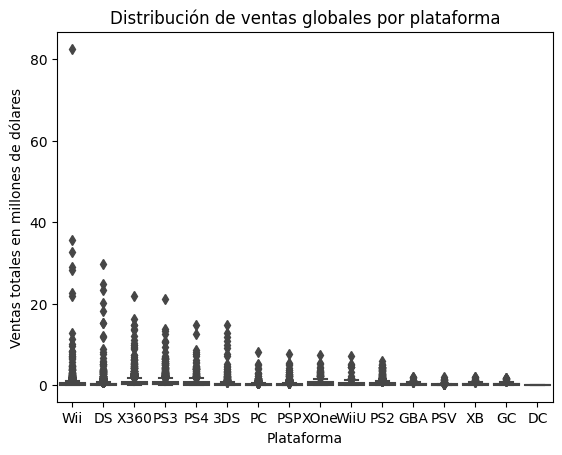

In [161]:
#Ventas globales de juegos por plataforma
sns.boxplot(data=df, x='platform', y='total_sales')
plt.title('Distribución de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales en millones de dólares')
plt.show()

Según lo observado en el boxplot de ventas por plataforma no existen diferencias significativas, la mayoría de juegos tiene ventas similares y generalmente bajas. Sin embargo, la presencia de tantos valores atípicos indican la existencia de juegos con ventas muy altas como Wii, DS, X360 y PS3. Las plataformas presentas cajas muy pequeñas indicando que las ventas están concetradas en un rango muy reducido y con los valores atípicos es evidente que algunos juegos impulsan las ventas promedio para arriba.

- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

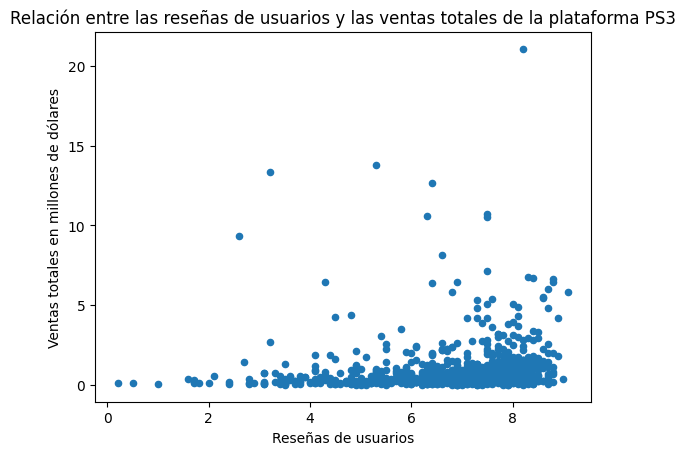

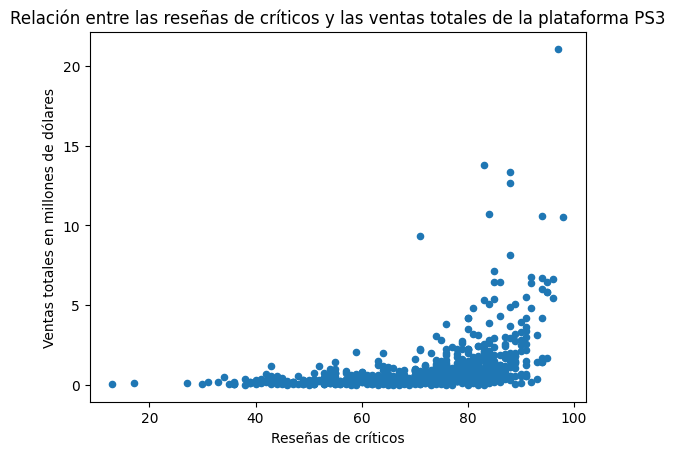

La correlación entre las reseñas de usuarios y las ventas totales de PS3 es 0.12841562938563028
La correlación entre las reseñas de críticos y las ventas totales de PS3 es 0.4327589578997135


In [163]:
#Correlación entre las reseñas de usuarios y las ventas de PS3
df_ps3 = df[df['platform']=='PS3']
df_ps3.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Relación entre las reseñas de usuarios y las ventas totales de la plataforma PS3')
plt.xlabel('Reseñas de usuarios')
plt.ylabel('Ventas totales en millones de dólares')
plt.show()

df_ps3.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Relación entre las reseñas de críticos y las ventas totales de la plataforma PS3')
plt.xlabel('Reseñas de críticos')
plt.ylabel('Ventas totales en millones de dólares')
plt.show()

#Correlación de las reseñas de usuarios con las ventas de PS3
corr_user_score_sales = df_ps3['user_score'].corr(df_ps3['total_sales'])

#Correlación de las reseñas de críticos con las ventas de PS3
corr_critic_score_sales = df_ps3['critic_score'].corr(df_ps3['total_sales'])

print(f"La correlación entre las reseñas de usuarios y las ventas totales de PS3 es {corr_user_score_sales}")
print(f"La correlación entre las reseñas de críticos y las ventas totales de PS3 es {corr_critic_score_sales}")

Con las gráficas de dispersión elaboradas y los coeficientes de correlación determinados es posible inferir que si bien existe una relación positiva entre las reseñas de los usuarios y las ventas de PS3, la correlación entre estas variables es baja por lo que no se puede afirmar que mejores reseñas en los usuarios generen mayores ventas. Por otra parte, se ven muchos valores atípicos con ventas elevadas y reseñas medias. DE igual manera, el gráfico de dispersión para las reseñas de críticos y las ventas totales muestra una tendencia positiva, lo que significa que a mejores críticas mayores ventas. También se identifican valores atípicos que se encuentran alejados del resto de datos con mayor concentración. El coeficiente de correlación para las reseñas de críticos y las ventas totales de PS3 es más elevado, indica una relación moderada, es decir, que las críticas de los profesionales influyen más en las ventas de PS3 que las reseñas de usuarios.

- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [177]:
# Análisis de ventas para ventas de los mismos juegos en distintas plataformas
df_games = df.groupby(['name', 'platform'])['total_sales'].sum().rename('total_sales').reset_index()

df_platform_counts = df_games.groupby('name')['platform'].nunique().reset_index()
print('\n')
print(df_platform_counts.head())
df_multiplatform = df_platform_counts[df_platform_counts['platform']>1]
print('\n')
print(df_multiplatform.head())

df_games = df_games[df_games['name'].isin(df_multiplatform['name'])]
print('\n')
print(df_games)



                          name  platform
0               Beyblade Burst         1
1            Fire Emblem Fates         1
2         Frozen: Olaf's Quest         2
3   Haikyu!! Cross Team Match!         1
4            Tales of Xillia 2         1


                                name  platform
2               Frozen: Olaf's Quest         2
11            007: Quantum of Solace         6
24                 11eyes: CrossOver         2
32                  187: Ride or Die         2
42  2010 FIFA World Cup South Africa         4


                               name platform  total_sales
2              Frozen: Olaf's Quest      3DS         0.59
3              Frozen: Olaf's Quest       DS         0.51
12           007: Quantum of Solace       DS         0.13
13           007: Quantum of Solace       PC         0.02
14           007: Quantum of Solace      PS2         0.43
...                             ...      ...          ...
11258     pro evolution soccer 2011      PSP         0.80
11

Es evidente que existen diferencias significativas en las ventas de los mismos juegos en distintas plataformas, esto puede deberse a prefeferencias del mercado por distintos motivos como mejor adaptación a controles, gráficos y otros. En este sentido, es importante que los desarrolladores de juegos consideren cuidadosamente las características de las plataformas y la popularidad de las mismas, así como la etapa de madurez en el mercado.

- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

           genre  total_sales
0         Action      1202.04
10        Sports       853.34
8        Shooter       758.56
3           Misc       615.83
7   Role-Playing       550.78
6         Racing       355.03
4       Platform       303.06
9     Simulation       269.62
2       Fighting       208.07
1      Adventure       149.81
5         Puzzle       110.28
11      Strategy        78.42


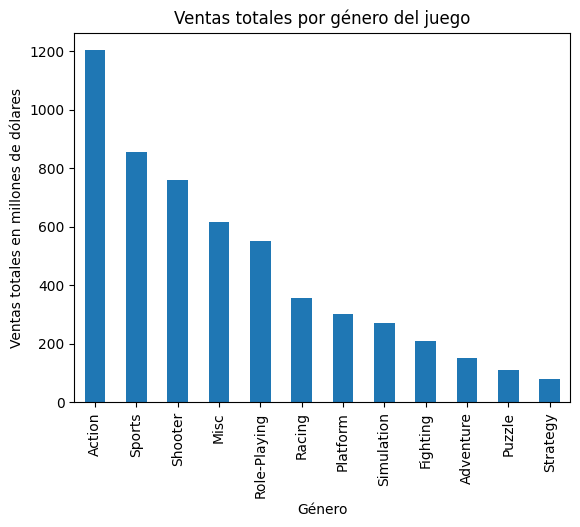

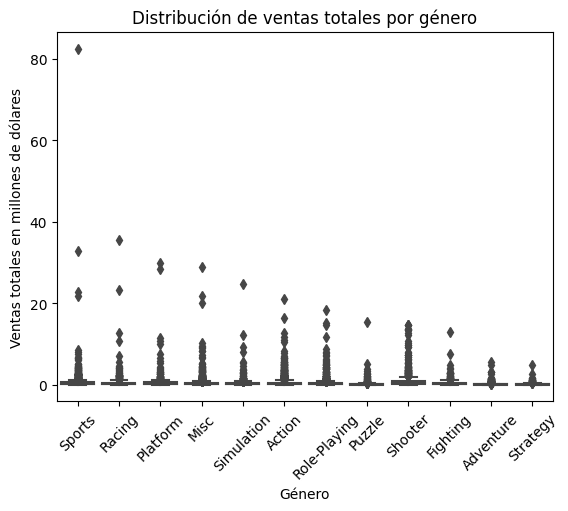

In [186]:
#Ventas totales por género
df_genre = df.groupby('genre')['total_sales'].sum().rename('total_sales').reset_index(). sort_values(by='total_sales', ascending=False)
print(df_genre)

#Visualización de ventas por género
df_genre.plot(x='genre',
             kind='bar',
             title='Ventas totales por género del juego',
             xlabel ='Género',
             ylabel='Ventas totales en millones de dólares',
             legend=False)
plt.show()

sns.boxplot(data=df, x='genre', y='total_sales')
plt.title('Distribución de ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas totales en millones de dólares')
plt.xticks(rotation=45)
plt.show()

Se puede observar que el género con más ventas acumuladas corresponde a Action y el género con menor cantidad de ventas acumuladas es el de Strategy con 78 millones. No se puede generalizar que los juegos de acción son más populares ya que como se observa en el gráfico de cajas, todos los géneros presentan promedios de ventas y rangos similares, sin embargo, se observan muchos valores atípicos que indican que tienen juegos que se venden más y se tiene mayor dispersión como en el caso de los juegos de sports. Los géneros de Strategy y Adventure tienen una menor dispersión y rangos más bajos por lo que se confirma que son los géneros con ventas más bajas.

## Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [193]:
def top_platforms_region(df, region):
    platform_sales_region = df.groupby('platform')[region].sum().rename(region).reset_index().sort_values(by=region, ascending=False)
    return platform_sales_region.head(5)

top_na_platforms = top_platforms_region(df, 'na_sales')
top_eu_platforms = top_platforms_region(df, 'eu_sales')
top_jp_platforms = top_platforms_region(df, 'jp_sales')

print('Las 5 principales plataformas de Norte América son:', '\n', top_na_platforms)
print('Las 5 principales plataformas de Europa son:', '\n', top_eu_platforms)
print('Las 5 principales plataformas de Japon son:', '\n', top_jp_platforms)

Las 5 principales plataformas de Norte América son: 
    platform  na_sales
13     X360    595.74
11      Wii    486.87
7       PS3    390.13
2        DS    371.98
6       PS2    200.49
Las 5 principales plataformas de Europa son: 
    platform  eu_sales
7       PS3    327.21
13     X360    268.32
11      Wii    258.32
2        DS    184.48
8       PS4    141.09
Las 5 principales plataformas de Japon son: 
    platform  jp_sales
2        DS    171.35
0       3DS    100.62
7       PS3     79.41
9       PSP     73.85
11      Wii     68.28


Se puede observar que el mercado de norteamérica y europa tienen mayores similitudes identificando a las mismas plataformas entre las 5 líderes. Por el contrario, el mercado japones distintas plataformas como las líderes de su mercado incluyendo únicamente a DS, PS3 y Wii que forman parte de las principales en los otros mercados. Asimismo, se evidencia que las ventas de norteamérica son mucho mayores a las de las otras regiones incluso en las mismas plataformas.

- Los cinco géneros principales por región. Explica la diferencia.

In [195]:
def top_genre_by_region(df, region):
    genre_sales_region = df.groupby('genre')[region].sum().rename(region).reset_index().sort_values(by=region, ascending=False)
    return genre_sales_region.head()

top_na_genre = top_genre_by_region(df, 'na_sales')
top_eu_genre = top_genre_by_region(df, 'eu_sales')
top_jp_genre = top_genre_by_region(df, 'jp_sales')

print('Los 5 principales géneros de Norte América son:', '\n', top_na_genre)
print('Los 5 principales géneros de Europa son:', '\n', top_eu_genre)
print('Los 5 principales géneros de Japon son:', '\n', top_jp_genre)

Los 5 principales géneros de Norte América son: 
            genre  na_sales
0         Action    580.04
10        Sports    432.70
8        Shooter    400.96
3           Misc    311.82
7   Role-Playing    211.85
Los 5 principales géneros de Europa son: 
       genre  eu_sales
0    Action    372.58
10   Sports    265.61
8   Shooter    248.07
3      Misc    167.09
6    Racing    129.05
Los 5 principales géneros de Japon son: 
            genre  jp_sales
7   Role-Playing    179.60
0         Action    108.39
3           Misc     72.49
10        Sports     52.51
4       Platform     36.32


Se observa que los generos principales en norteamérica y Europa son los mismos a diferencia de Role-Playing que ocupa el puesto cinco en NA y Racing en EU. Sin embargo, la cuota de mercado en NA es mayor a las ventas europeas. Por otra parte, en Japon predominan los juegos de Role-Playing y Action. Se observa que el mercado japones es culturalmente diferente al occidental y esto se refleja en las ventas y los géneros de juego.

- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

            rating  na_sales
1                E    873.10
4                M    607.34
6                T    479.08
2             E10+    343.02
7  no especificado    323.49
3               EC      1.53
0               AO      1.26
5               RP      0.00


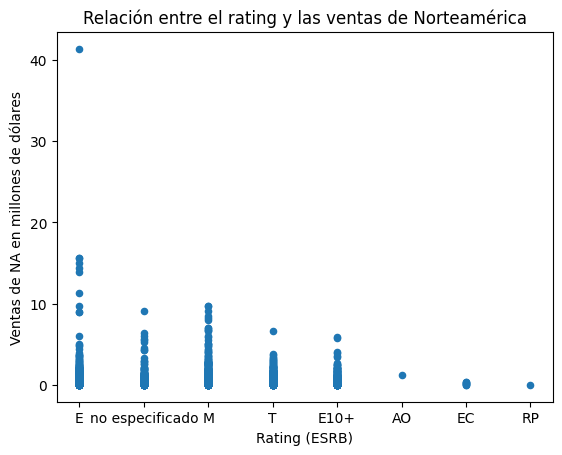

            rating  eu_sales
1                E    508.71
4                M    414.11
6                T    258.17
7  no especificado    253.45
2             E10+    181.92
0               AO      0.61
3               EC      0.11
5               RP      0.03


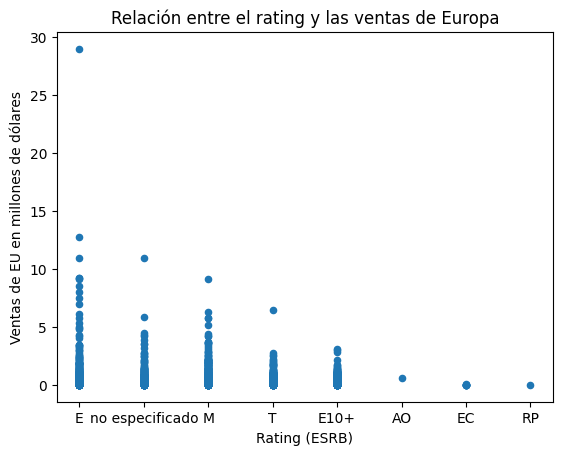

            rating  jp_sales
7  no especificado    291.65
1                E    147.33
6                T     91.32
4                M     46.23
2             E10+     39.05
0               AO      0.00
3               EC      0.00
5               RP      0.00


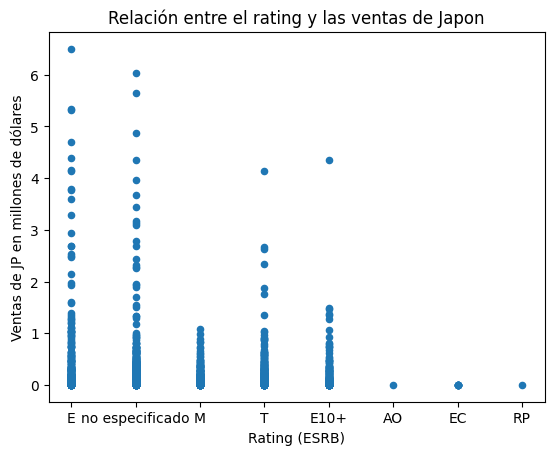

In [199]:
# Correlación entre el rating y las ventas en NA
df_rating_na_sales = df.groupby('rating')['na_sales'].sum().rename('na_sales').reset_index().sort_values(by='na_sales', ascending=False)
print(df_rating_na_sales)

df.plot(x='rating', y='na_sales', kind='scatter')
plt.title('Relación entre el rating y las ventas de Norteamérica')
plt.xlabel('Rating (ESRB)')
plt.ylabel('Ventas de NA en millones de dólares')
plt.show()

# Correlación entre el rating y las ventas en EU
df_rating_eu_sales = df.groupby('rating')['eu_sales'].sum().rename('eu_sales').reset_index().sort_values(by='eu_sales', ascending=False)
print(df_rating_eu_sales)

df.plot(x='rating', y='eu_sales', kind='scatter')
plt.title('Relación entre el rating y las ventas de Europa')
plt.xlabel('Rating (ESRB)')
plt.ylabel('Ventas de EU en millones de dólares')
plt.show()

# Correlación entre el rating y las ventas en JP
df_rating_jp_sales = df.groupby('rating')['jp_sales'].sum().rename('jp_sales').reset_index().sort_values(by='jp_sales', ascending=False)
print(df_rating_jp_sales)

df.plot(x='rating', y='jp_sales', kind='scatter')
plt.title('Relación entre el rating y las ventas de Japon')
plt.xlabel('Rating (ESRB)')
plt.ylabel('Ventas de JP en millones de dólares')
plt.show()

Se puede evidenciar que la calificación E tanto para el mercado Europeo como el norteamericano presentan mayores ventas, esto puede deberse a menores restricciones y un público más amplio. Sin embargo en Japon se presentan mayores ventas de juegos con una calificación no especificada como tambien aquellos juegos con calificación E. No existe evidencia suficiente para para afirmar que las calificaciones ESRB afectan las ventas en cada región.

## Paso 5. Prueba las siguientes hipótesis

**H0:** Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

**H1:** Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas.

In [210]:
# Eliminar valores ausentes en la columna user_score
df_user = df.dropna(subset=['user_score'])

# Eliminar valores atípicos para evitar sesgar los resultados
Q1 = df_user['total_sales'].quantile(0.25)
Q3 = df_user['total_sales'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para los valores atípicos
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

# Filtramos los valores atípicos
df_user = df_user[(df_user['total_sales'] >=lower_limit) & (df_user['total_sales'] <=upper_limit)]

df_xone = df_user[df_user['platform']=='XOne']['user_score']
df_pc = df_user[df_user['platform']=='PC']['user_score']

#Varianza de las columnas
levene_result= st.levene(df_xone, df_pc)
print('valor p test de levene:',levene_result.pvalue)

alpha=0.05

if levene_result.pvalue < alpha: # comparar el valor p con el umbral
    print("Las varianzas no son iguales")
else:
    print("Las varianzas son iguales")

#Prueba de hipotesis
results = st.ttest_ind(df_xone, df_pc, equal_var=True)
print('valor p test de hipotesis:',results.pvalue)

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p test de levene: 0.2635064037778977
Las varianzas son iguales
valor p test de hipotesis: 0.01407148778747836
Rechazamos la hipótesis nula


Se determinó la hipotesis nula como la igualdad de las medias de las calificaciones para las plataformas Xone y PC. Por lo tanto, la hipótesis alternativa representa que existe diferencia entre las medias poblacionales. Asimismo, se determinó el nivel de significancia como 0.05.

Se eliminaron los valores nulos de las calificaciones de usuarios y los valores atípicos que fueron calculados despues de establecer los límites inferior y superior en base a los cuartiles Q1 y Q3 y el rango intercuartílico IQR. Por lo tanto quedó un dataframe filtrado sin valores nulos en la columna user_score ni valores atípicos en la columna total_sales.
Se realizó una prueba de hipótesis sobre igualdad de las medias de dos poblaciones, por este motivo se empleó la funcion st.ttest_ind(), verificando previamente la igualdad de las varianzas con el test de levene que determinó la igualdad de las varianzas. Al obtener un pvalue menor a alpha se rechazó la hipotesis nula determinando que las calificaciones promedio de los usuarios no son iguales para las plataformas XOne y PC.

**H0:** Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

**H1:** Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [211]:
df_action = df_user[df_user['genre']=='Action']['user_score']
df_sports = df_user[df_user['genre']=='Sports']['user_score']
#Varianza de las columnas
levene_result= st.levene(df_action, df_sports)
print('valor p test de levene:',levene_result.pvalue)

alpha=0.05

if levene_result.pvalue < alpha: # comparar el valor p con el umbral
    print("Las varianzas no son iguales")
else:
    print("Las varianzas son iguales")

#Prueba de hipotesis
results = st.ttest_ind(df_action, df_sports, equal_var=False)
print('valor p test de hipotesis:',results.pvalue)

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p test de levene: 1.498866681665654e-06
Las varianzas no son iguales
valor p test de hipotesis: 1.6124217534267969e-06
Rechazamos la hipótesis nula


Al igual que en el caso anterior, se definió la hipotesis nula como la igualdad de las medias de calificación de usuarios para los generos de acción y deportes y la hipótesis alternativa como que existen diferencias en las calificaciones promedios de los usuarios para estos géneros. El nivel de significancia alpha se definió como 0.05. Se realizó una prueba de hipótesis sobre igualdad de las medias de dos poblaciones, por este motivo se empleó la funcion st.ttest_ind(), verificando previamente la igualdad de las varianzas con el test de levene que determinó que las varianzas no son iguales. Al obtener un pvalue menor a alpha se rechazó la hipotesis nula determinando que las calificaciones promedio de los usuarios no son iguales para los géneros de acción y deportes.

## Paso 6. Escribe una conclusión general

El mercado de videojuegos en los últimos años tuvo gran volatilidad y dinamismo. A pesar de que las plataformas muestran ventas similares en promedio, existen valores atípicos que se deben a juegos de gran popularidad que incrementan las ventas acumuladas. Existe la necesidad de analizar correctamente el mercado, ya que la madurez de una plataforma varía en gran medida respecto a las demás, dificultando establecer una estrategia común. Es evidente que se deben analizar las plataformas con ventas representativas de los últimos años para definir estrategias comerciales y publicitarias y definir que juegos deben salir al mercado en que plataforma especificamente, ya que plataformas populares durante años estan tendiendo a la baja considerable en ventas.

Las tendencias regionales se evidencian notablemente, mostrando grandes diferencias culturales especificamente en los mercados orientales (Japon) y occidentales (EU y NA). Esta situación obliga a definir estrategias localizadas por región.

Si bien las calificaciones ESRB no muestran gran incidencia en las ventas, no se debe ignorar su relevancia, especialmente en la calificación apta para todo público.